In [1]:
# This case study is very famous dataset in machine learning. The Titanic Survival Data

# The data contains information about 891 passengers. It also indicates whether the passanger survived the titanic crash or not?

# The goal is to create a predictive model which can predict the survival of a given person, if they were to board the
# titanic and the ship sinks...again!

# In the below case study, I will discuss step by step approach to create a Machine Learning predictive model in such
# scenarios. We can use this flow as a template to solve any supervised ML classification problem

# The flow of the case study is as below:
# - Reading the data in python
# - Defining the problem statement
# - Identifying the Target variable
# - Looking at the distribution of Target variable
# - Basic Data exploration
# - Rejecting the useless columns
# - Visual Exploratory Data Analysis for data distribution (Histogram and Barcharts)
# - Feature selection based on data distribution
# - Outlier treatment
# - Missing values treatement
# - Visual correlation analysis
# - Statistical correlation analysis (Feature selection)
# - Converting data to numeric for ML
# - Sampling and K-fold cross validation
# - Trying multiple classification algorithms
# - Selecting the best model
# - Deploying the best model in production

In [2]:
# Reading the data into python

# We need to unnderstand data and domain before applying any machine learning algorithm

# The goal is to learn from this data and predict if a new person boards titanic ship and it sinks again..whether he/she
# will survive or not..

In [3]:
# Data description
# The business meaning of each column in the data is as below:
# - PassengerId - The Id for each passenger
# - Survived - Whether survived or not? 1=Survived, 0=Died
# - Pclass - The travel class of the passanger
# - Name - Name of the passanger
# - Sex - The gender of the passanger
# - Age - The age of the passanger
# - SibSp - Number of siblings/Spouses Aboard
# - Parch - Number of parents/child aboard
# - Ticket - The ticket number of the passanger
# - Fare - The amount of fare paid by the passanger
# - Cabin - The cabin number allotted
# - Embarked - Port of Embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

In [4]:
# Suppressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
os.getcwd()

'C:\\Users\\Chinmaya\\IVY Python ML-Oct 2022'

In [6]:
# Reading the dataset
import pandas as pd
import numpy as np
TitanicSurvivalData=pd.read_csv('C:/Users/Chinmaya/IVY Python ML-Oct 2022/TitanicSurvivalData.csv',encoding='latin')
print('Printing before deleting any duplicate values:',TitanicSurvivalData.shape)

Printing before deleting any duplicate values: (891, 12)


In [7]:
# Removinng the duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()
print('Printing after deleting duplicate values',TitanicSurvivalData.shape)

Printing after deleting duplicate values (891, 12)


In [8]:
# Printing sample data
TitanicSurvivalData.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Defining the problem statement

# Create a predictive model which can tell if a person will survive the titanic crash or not?
# Target variable: Survived
# Predictors: Age, sex, passanger class, etc.

# Survived=0-->Passanger died
# Survived=1-->Passanger survived

In [10]:
# Determining the type of Machine Learning
# Based on the problem statement we can understand that we need to create a supervised ML classification model,
# as the Target variable is categorical

In [11]:
# looking at the distribution of the Target variable
# - If target variable distribution is too skewed when the predictive modeling will not be possible
# - Bell curve is desirable but slightely positive skew or negative skew is also fine
# - When performing classification, make sure there is a balance in the distribution of each class otherwise it impacts the
# Machine learning algorithms ability to learn all the classes

<AxesSubplot:xlabel='Survived'>

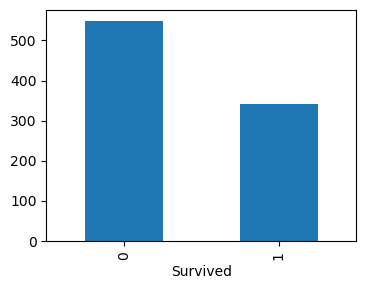

In [12]:
%matplotlib inline
# Creating bar charts as the target variable is categorical
GroupedData=TitanicSurvivalData.groupby('Survived').size()
GroupedData.plot(kind='bar',figsize=(4,3))

In [13]:
# The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows
# for each category to learn from.

In [14]:
# Basic Data Exploration

# The step is performed to gauge the overall data. The volume of the data, the types of columns present in the data.
# Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative

# This step helps to start the column rejection process. You must look at each column carefully and ask, does this column
# affect the values of Target variable? For example in this case study, you will ask, does this column affect the survival
# of the passanger? If the answer is a clear 'No', then remove the column immediately from the data, otherwise keep the
# column for further analysis

# There are four commands which are used for Basic Data Exploration in Python
# - head() - This step is to see few sample of the data
# - info() - This provides the summarized information of the data
# - describe() - This provides the descriptive statistical details of the data
# - nunique() - This helps us to identify if a column is categorical or continuous

In [15]:
# Looking at the sample rows in the data
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [17]:
# Looking at the descriptive statistics of the data
TitanicSurvivalData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
# Finging unique values for each column
# To understand which column is categorical and which is continuous
# Typically if the number of unique values are <20 then the variable is likely to be said as category or otherwise continuous
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [19]:
# Basic Data Exploration Results
# Based on the above exploration above, you can create a simple report of the data, noting down your observations regarding
# each columns. Hence, creating a initial roadmap for further analysis

# The selected columns in this step are not final, further study will be done and then final list will be created
# PassengerId: Qualitative-->Rejected
# Suvived: Categorical-->Selected
# Pclass: Categorical-->Selected
# Name: Qualitative-->Rejected
# Sex: Categorical-->Selected
# Age: Continuous-->Selected
# SibSp: Categorical-->Selected
# Parch: Categorical-->Selected
# Ticket: Qualitative-->Rejected
# Fare: Continuous-->Rejected
# Cabin: Qualitative-->Rejected. Also this has too many missing values
# Embarked: Categorical-->Selected

In [20]:
# Removing useless columns from the data
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId', 'Name', 'Ticket', 'Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [21]:
# Visual Exploratory Data Analysis
# - Categorical variables: Bar plot
# - Continuous variables: Histogram

In [22]:
# Visualize distribution of all the Categorical Predictor variables in the data using bar plots

# We can spot a categorical variable in the data by looking at the unique values in them. Typically a categorical variable
# contains less than  Unique values AND there is repetition of values, which means the data can be grouped by those unique
# values.

#  Based on the Basic Data Exploration above, we have spotted five categorical predictors in the data

# Categorical Predictors: 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'

# We use bar charts to see how the data is distributed for these categorical columns

In [23]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# We are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))
    
    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

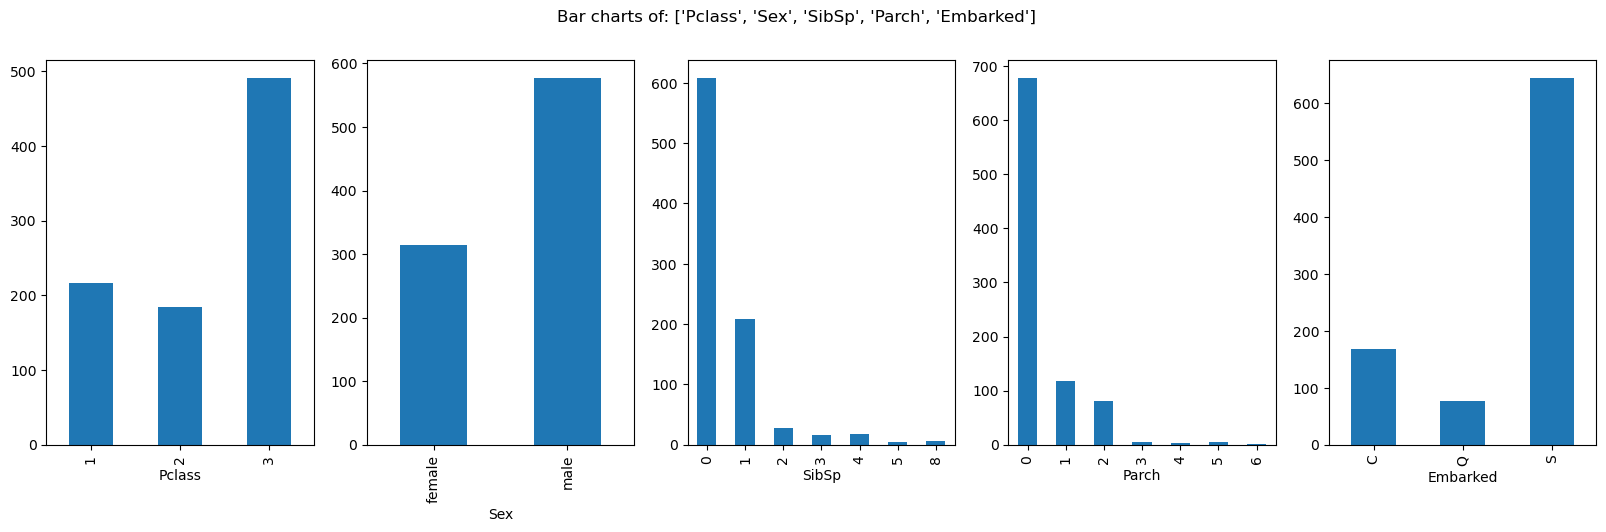

In [24]:
####################################################################################
# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [25]:
# Treating Imbalance in categorical predictors
# Grouping the SibSP values 2,3,4,5,8 in one single bucket as 2
TitanicSurvivalData['SibSp'][TitanicSurvivalData['SibSp']>=2]=2

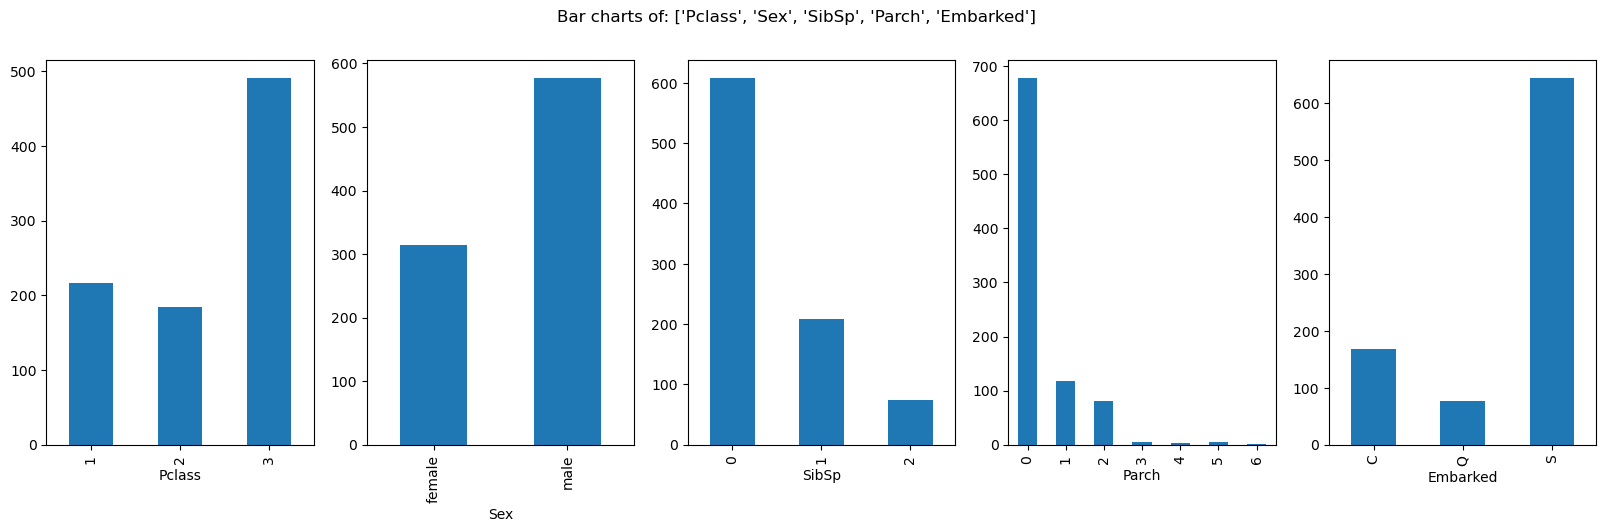

In [26]:
# Visualizing the SibSp after grouping
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [27]:
# Treating Parch Imbalance
# Grouping the Parch values 3,4,5,6 in one single bucket as 3
TitanicSurvivalData['Parch'][TitanicSurvivalData['Parch']>=3]=3

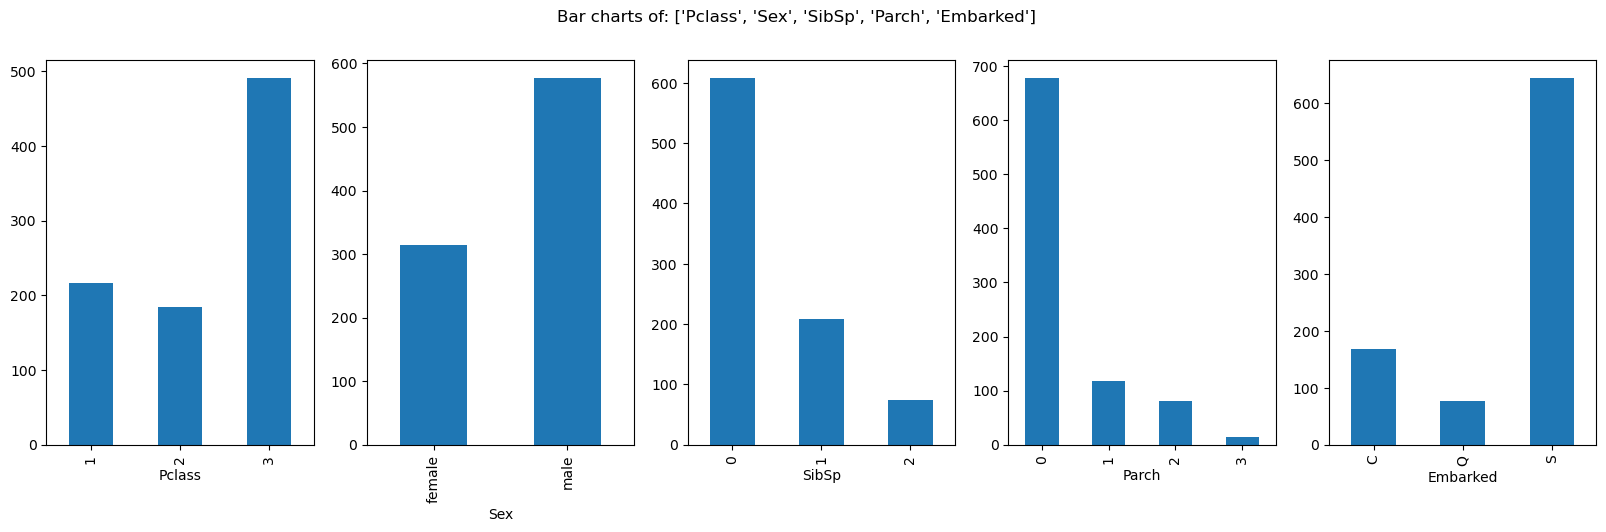

In [28]:
# Visualizing the Parch after grouping
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'])

In [29]:
# Bar Charts Interpretation

# These bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis

# In the ideal bar chart each category has comparable frequency. Hence, there are enough rows for each category in the data
# for the ML algorithm to learn.

# If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are
# present in very low numbers. These kind of columns may not be very helpful in machine learning. We confirm this in the
# correlation analysis section and take a final call to select or reject the column.

# In this data, all the categorical columns except have satisfactory distribution to be considered for machine learning

# Selected Categorical Variables: All the categorical variables are selected for further analysis

# 'Pclass','Sex','SibSp','Parch','Embarked'

In [30]:
# Visualize distribution of all the Contiuous Predictor variables in the data using histograms

# Based on the Basic Data Exploration, there are two continuous predictor variables 'Age' and 'Fare'

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

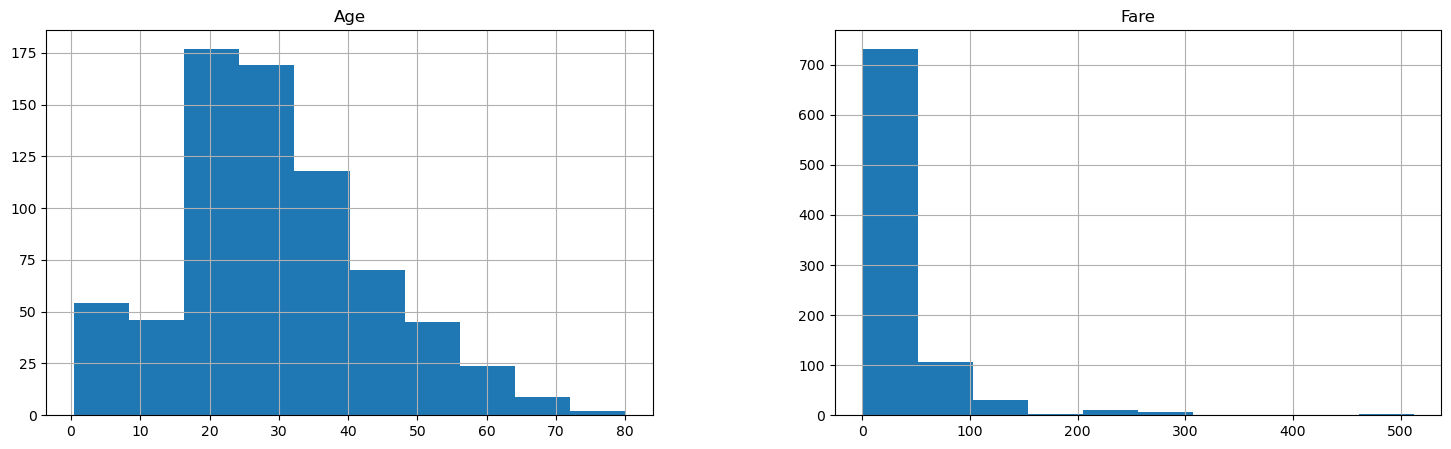

In [31]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,5))

In [32]:
# Histogram Interpretation

# Histograms shows us the data distribution for a single contiuous variable

# The X-axis shows the range of values and Y-axis represent the number of values in that range. For example, in the above
# histogram of 'Age',  there are around 175 rows in the data that has an Age between 20 to 30.

# The ideal outcome for histogram is a bell curve or slightely skewed bell curve. If there is too much skewness, then
# outlier treatmrnt should be done and the column should be re-exmained, if that also does not solve the problem then
# only reject the column.

# Selected Contiuous Variables:
# Age: Selected. The distribution is good.
# Fare: Selected. Outliers seen beyond 300, need to treat them.

In [33]:
# Outlier Treatment

# Outliers are extreme values in the data which are far away from most of the values. You can see them as the tails in the
# histogram.
# Outlier must be treated one column at a time. As the treatment will be slightely different for each column

# Why I should treat outliers?
# Outliers bias the training of machine learning models. As the algorithm tries to fit the extreme value, it goes away from
# the majority of the data
# There are 2 options to treat outliers in the data.
# Option-1: Delete the outlier records. Only if there are just few rows lost.
# Option-2: Impute the outlier values with a logical business value

# Below we are finding out most logical value to be replaced in place of outliers by looking at the histogram

In [34]:
# Replacing outliers for 'Fare'

In [35]:
# Finding nearest values to 300 mark
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']<300].sort_values(ascending=False)

27     263.000
341    263.000
438    263.000
88     263.000
742    262.375
        ...   
633      0.000
413      0.000
822      0.000
732      0.000
674      0.000
Name: Fare, Length: 888, dtype: float64

In [36]:
# Above result shows the nearest logical value is 263.0, hence, replacing any value above 300 with it.

In [37]:
# Replacing outliers with nearest possible value
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263.0

In [38]:
# Visualization distribution after outlier treatment
# The distribution has improved after the outlier treatment. There are still a tail but it is thick, that means there are
# many values in that range, hence it is acceptable.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

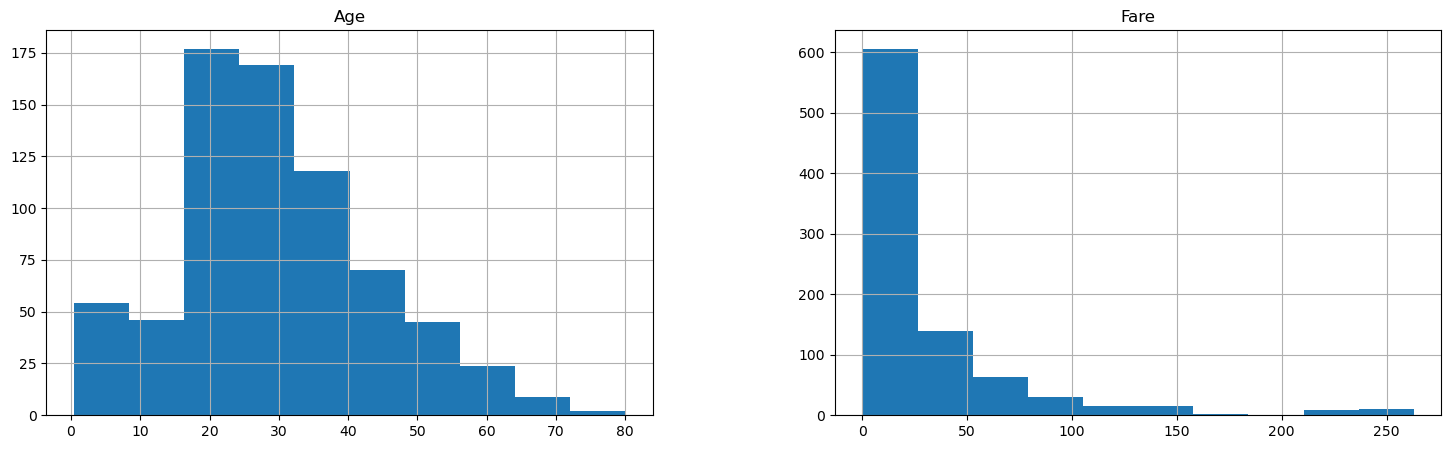

In [39]:
TitanicSurvivalData.hist(['Age','Fare'], figsize=(18,5))

In [40]:
# Missing values treatment

In [41]:
# Missing values are treated for each column separately

# If a column has more than 30% data missing, then missing value treatment cannot be done. That column must be rejected
# because too much information is missing.

# There are below options for treating missing values in data.

# Delete the missing value rows if there are only few records
# Impute the missing values with MEDIAN value for continuous variables
# Impute the missing values with MODE value for categorical variables
# Interpolate the values based on nearby values
# Interpolate the values based on business logic

In [42]:
# Finding how many missing values are there for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [43]:
# I am using Median and Mode value for the missing value replacement

In [44]:
# Replacing missing values of Age with median value
# Median - Order the number in ascending order then find the middle number in the row
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)

# Replacing missing values of Embarked with Mode value
# Mode - The most repetitive number in the row is the Mode
TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0], inplace=True)

In [45]:
# Checking the issing values again after the treatment
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
# Feature Selection

In [47]:
# Now its time to finally choose the best columns(Features) which are correlated to the Target variable. This can be done
# directly by measuring the correlation values or ANOVA/Chi-Square tests. However, it is always helpful to visualize the
# relation between the Target variable and each of the predictors to get a better sense of data.

# I have listed below the techniques used for visualizing relationship between two variables as well as measuring the
# strength statistically

# Visual exploration of relationship between variables
# Continuous v/s Continuous---> Scatter Plot
# Categorical v/s Continuous---> Box Plot
# Categorical v/s Categorical---> Grouped Bar Plot

# Statistical measurement of relationship strength between variables
# Continuous v/s Continuous---> Correlation matrix
# Categorical v/s Continuous---> ANOVA test
# Categorical v/s Categorical---> Chi-Square test

# In this case study the Target variable is categorical, hence below two scenarios will be present
# Categorical Target variable v/s Continuous Predictor
# Categorical Target variable v/s Categorical Predictor

In [48]:
# Relationship exploration: Categorical v/s Continuous--> Box Plots

# When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using
# bar plots/Box Plots and measure the strength of relation using ANOVA test

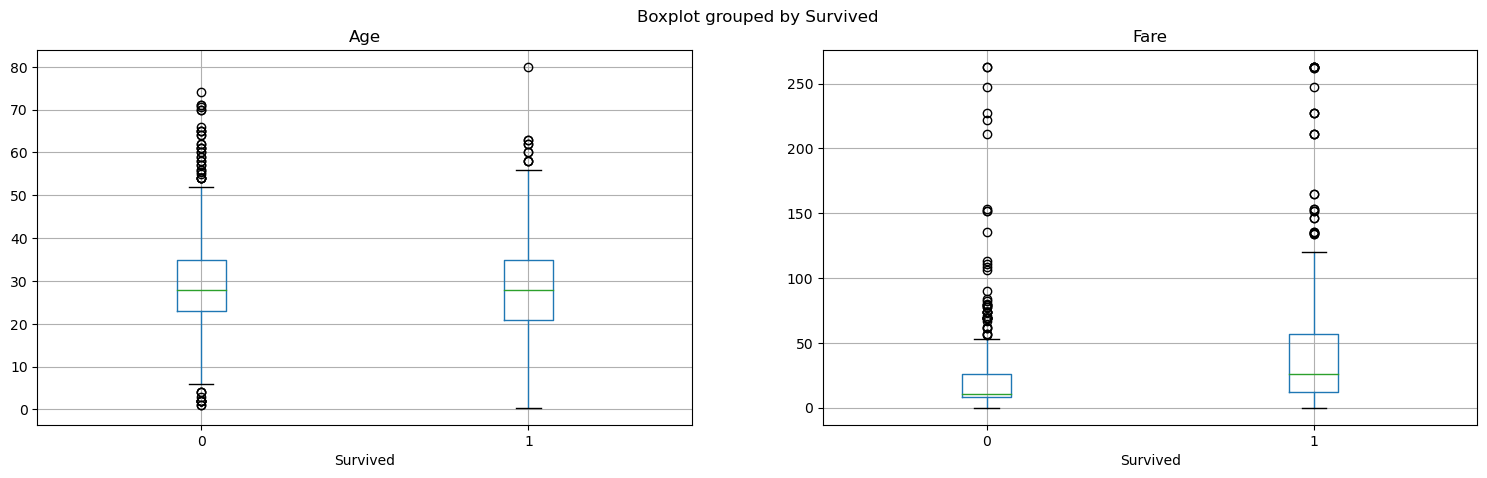

In [49]:
# Box plots for Categorical target Variable 'Survived' and continuous predictors
ContinuousColsList=['Age','Fare']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each contiuous predictor against the Target Variable 'Survived'
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    TitanicSurvivalData.boxplot(column=PredictorCol, by='Survived', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [50]:
# Box-Plots interpretation

# What should you look for in these box plots?

# These plots gives an idea about the data distribution of continuous predictor in the Y-axis foreach of the category in
# the X-axis
# If the distribution looks similar for each category (Boxes are in the same line), that means the continuous variable has
# NO effect on the target variable.
# Hence, the variables are not correlated to each other.

# For example, look at the first chart 'Age' v/s 'Survived'. The boxes are in the same line! It means that people who have
# survived the crash and those who did not survive the crash have similar kind of ages. Hence, I cannot distinguish
# between survival and non-survival effectively based on thhe Age. So, this column is NOT correlated with the Survived.

# The other chart exhibit opposite characteristics. Means the data distribution is different (the boxes are not in the same line!)
# for each category of survival. It hints that these variables might be correlated with Survived.

# We confirm this by looking at the results of ANOVA test below

In [51]:
# Statistical Feature Selection (Categorical v/s Continuous) using ANOVA test

# Analysis of variance (ANOVA) is performed to check if there is any relationship between the given continuous and 
# categorical variables
# Assumption(H0): There is NO relation between the given variables (i.e., The average (mean) values of the numeric Predictor
# variable is same for all the groups in the categorical Target variable)
# ANOVA test result: Probability of H0 being true

In [52]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('####### ANOVA Results #######\n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-value is <0.5, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
            
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            
    return(SelectedPredictors)

In [53]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age','Fare']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

####### ANOVA Results #######

Age is NOT correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 1.8421954983111479e-16


['Fare']

In [54]:
# The results of ANOVA confirm our visual analysis using box plots above.
# Look at the P-value of Age, it got rejected by a little margin!!
# In such scenarios you may decide to include this variable which is at the boundary line and see if it helps to increase
# the accuracy

# Final selected Continuous columns:
# 'Fare'

In [55]:
# Relationship exploration: Categorical v/s Categorical--Grouped Bar Charts
# When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them
# visually using barplots and statistically using Chi-square test

In [56]:
# Cross tabulation between two categorical variables
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


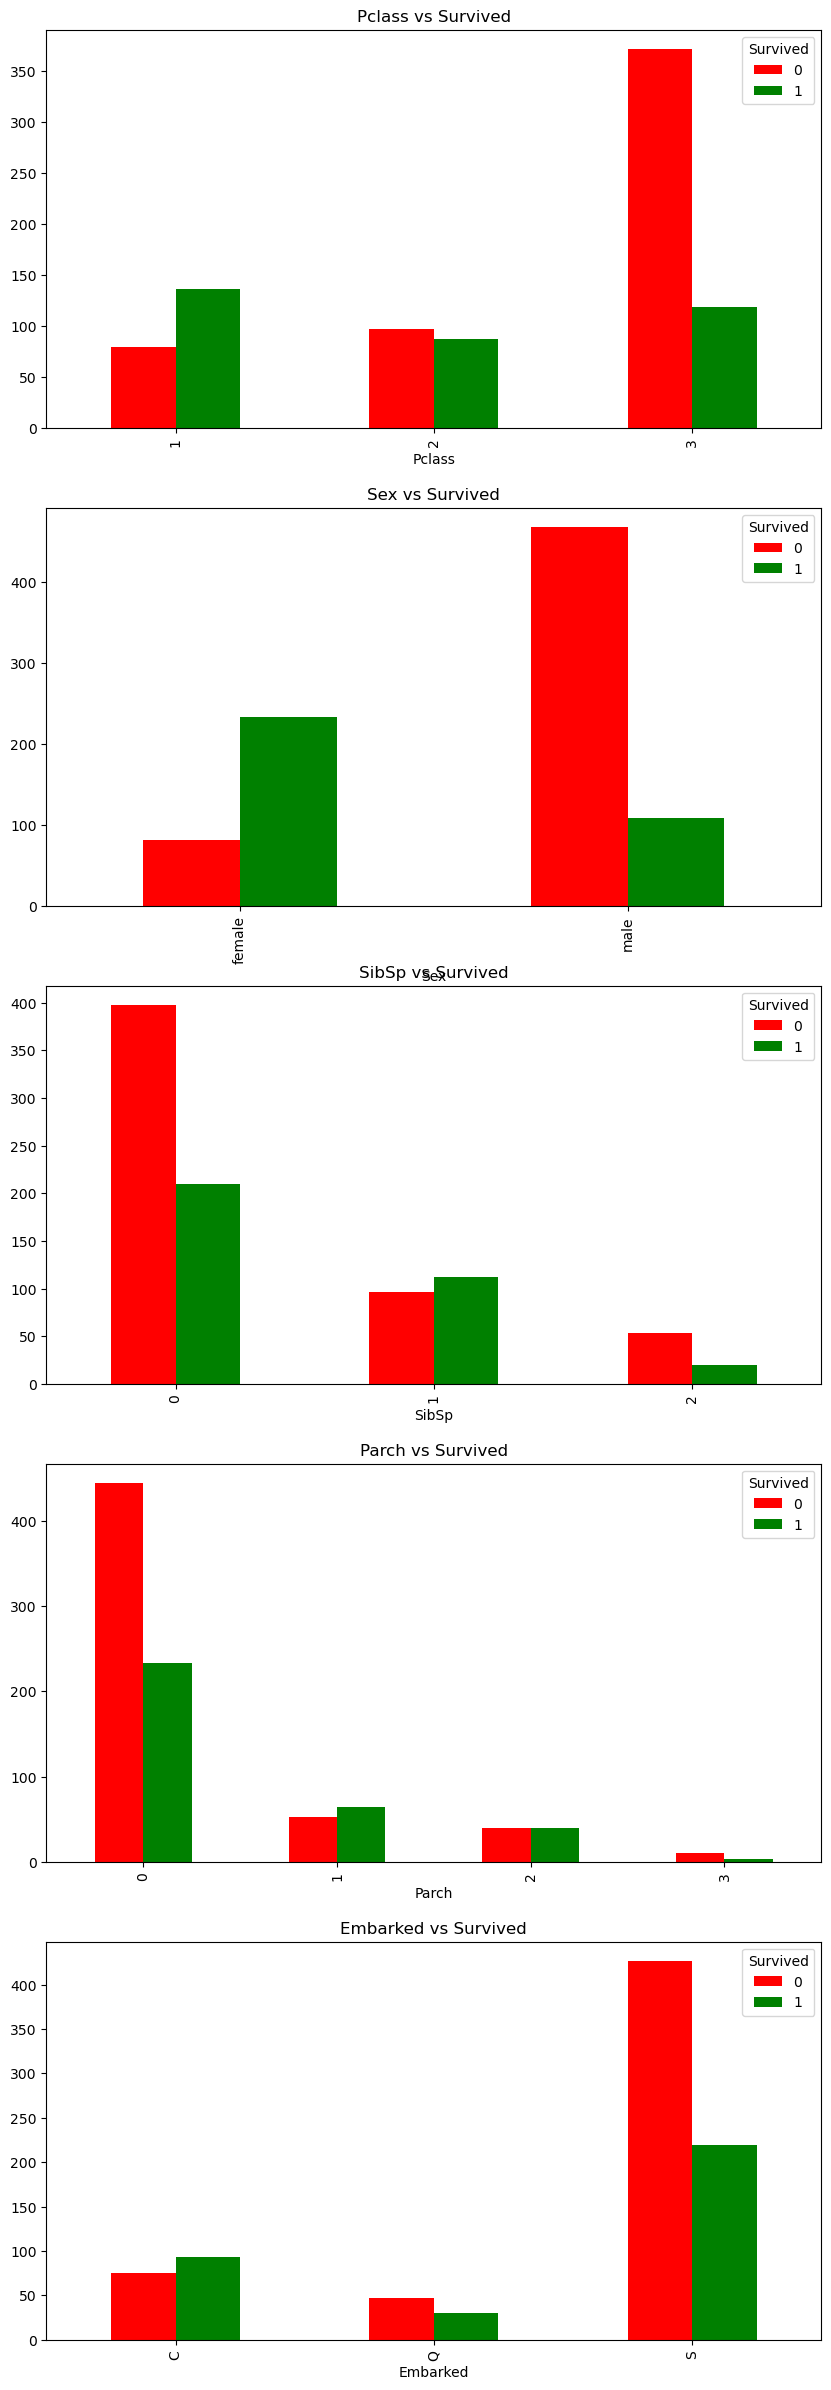

In [57]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable 'Survived'
for Categoricalcol, i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=TitanicSurvivalData[Categoricalcol], columns=TitanicSurvivalData['Survived'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=Categoricalcol+ ' vs '+'Survived')

In [58]:
# Grouped Bar charts Interpretation

# What to look for in these grouped bar charts?
# These grouped bar charts show the frequency in the Y-axis and category in the X-axis. If the ratio of bars is silmilar
# across all categories, then the two columns are not correlated
# On the other hand, look at the Sex v/s Survived plot. The bars are different for each category, Hence,columns are
# correlated with each other.
# We confirm this analysis in below section by using Chi-Square Tests

In [59]:
# Statistical Feature Selection (Categorical v/s Categorical) using Chi-Square Test

# Chi-Square test is conducted to check the correlation between two categorical variables

# Assumption(H): The two columns are NOT related to each other
# Result of Chi-Square Test: The probability of H0 being true
# More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [60]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            
    return(SelectedPredictors)

In [61]:
CategoricalVariables=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# Calling the function
FunctionChisq(inpData=TitanicSurvivalData,
             TargetVariable='Survived',
             CategoricalVariablesList= CategoricalVariables)

Pclass is correlated with Survived | P-Value: 4.549251711298793e-23
Sex is correlated with Survived | P-Value: 1.1973570627755645e-58
SibSp is correlated with Survived | P-Value: 7.28560209980573e-07
Parch is correlated with Survived | P-Value: 2.5227955142443396e-05
Embarked is correlated with Survived | P-Value: 2.3008626481449577e-06


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [62]:
# Finally selected Categorical variables:
# 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'

In [63]:
# Selecting final predictors for Machine Learning

# Based on the above tests, selecting the final columns for machine learning

In [64]:
SelectedColumns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Fare']

# Selecting final columns
DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [65]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [66]:
# Data Pre-processing for Machine Learning

# List of steps performed on predictor variables before data can be used for machine learning

# - Converting each Ordinal Categorcial columns to numeric
# - Converting Binary nominal Categorical columns to numeric using 1/0 mapping
# - Converting all other nominal categorical columns to numeric using pd.get_dummies()
# - Data Transformation (Optional): Standardization/Normalization/log/sqrt Important if you are using distance based
# algorithms like KNN, or Neural Networks

# In this data therre is no Ordinal categorical variable

In [67]:
# Converting the binary nominal variable to numeric using 1/0 mapping

In [68]:
# Converting the binary nominal variable sex to numeric
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

In [69]:
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,1,1,0,S,7.2500
1,1,0,1,0,C,71.2833
2,3,0,0,0,S,7.9250
3,1,0,1,0,S,53.1000
4,3,1,0,0,S,8.0500


In [70]:
# Converting the nominal variable to numeric using get_dummies()

In [71]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Survived']=TitanicSurvivalData['Survived']

# Printing sample rows
DataForML_Numeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


In [72]:
# Machine Learning: Splitting the data into Training and Testing sample

# We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good
# the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built.
# Typically 70% of data is used as Training data and the rest 30% is used as Testing data

In [73]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Survived'],
      dtype='object')

In [74]:
# Separate Target Variable and Predictor Variables
TargetVariable='Survived'
Predictors = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# Demonstration for deployment with final cols
# Predictors=['Pclass', 'Sex', 'Fare']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [75]:
X_train[0:4]

array([[ 3.    ,  1.    ,  0.    ,  0.    ,  6.4958,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  1.    ,  0.    ,  0.    ,  8.1125,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  1.    ,  0.    ,  0.    ,  8.05  ,  0.    ,  0.    ,
         1.    ],
       [ 3.    ,  0.    ,  2.    ,  2.    , 46.9   ,  0.    ,  0.    ,
         1.    ]])

In [76]:
# Standardization/Normalization of data

# You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy
# of the raw data

# However, if you are using KNN or Neural Networks, then this step becomes necessary

In [77]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMax normalization
# PredcitorScalar-MinMaxScalar()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623,)
(268, 8)
(268,)


In [79]:
X[0:4]

array([[1.        , 1.        , 0.5       , 0.        , 0.02756654,
        0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.27103916,
        1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.03013308,
        0.        , 0.        , 1.        ],
       [0.        , 0.        , 0.5       , 0.        , 0.20190114,
        0.        , 0.        , 1.        ]])

In [80]:
# Inverse transform will bring back the original scale
print(PredictorScalerFit.inverse_transform(X)[0:4])

[[ 3.      1.      1.      0.      7.25    0.      0.      1.    ]
 [ 1.      0.      1.      0.     71.2833  1.      0.      0.    ]
 [ 3.      0.      0.      0.      7.925   0.      0.      1.    ]
 [ 1.      0.      1.      0.     53.1     0.      0.      1.    ]]


In [81]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'Lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=5, penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

# Measuring accuracy on Testing data
from sklearn import metrics
print(metrics.classification_report(y_test,prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       157
           1       0.70      0.75      0.72       111

    accuracy                           0.76       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.76      0.77       268

[[122  35]
 [ 28  83]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.76723952 0.77641044 0.75981111 0.82182649 0.76650762 0.74942095
 0.76173197 0.74942095 0.79649424 0.76195095]

Final Average Accuracy of the model: 0.77


In [82]:
# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=3)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.83      0.68      0.75       111

    accuracy                           0.81       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268

[[141  16]
 [ 35  76]]
Accuracy of the model on Testing Sample Data: 0.81

Accuracy values for 10-fold Cross Validation:
 [0.80938963 0.81776069 0.76791722 0.83190886 0.82022472 0.78065407
 0.7911255  0.77562138 0.82683216 0.79359477]

Final Average Accuracy of the model: 0.8


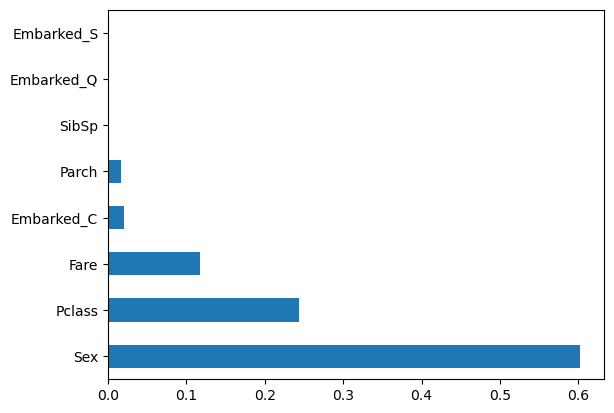

In [83]:
from sklearn import tree
# choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=3,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most importat columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X, y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n', Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [84]:
# Plotting a Decision Tree
# Installing the required library for plotting the decision tree
# !pip install dtreeplt

TypeError: annotate() missing 1 required positional argument: 'text'

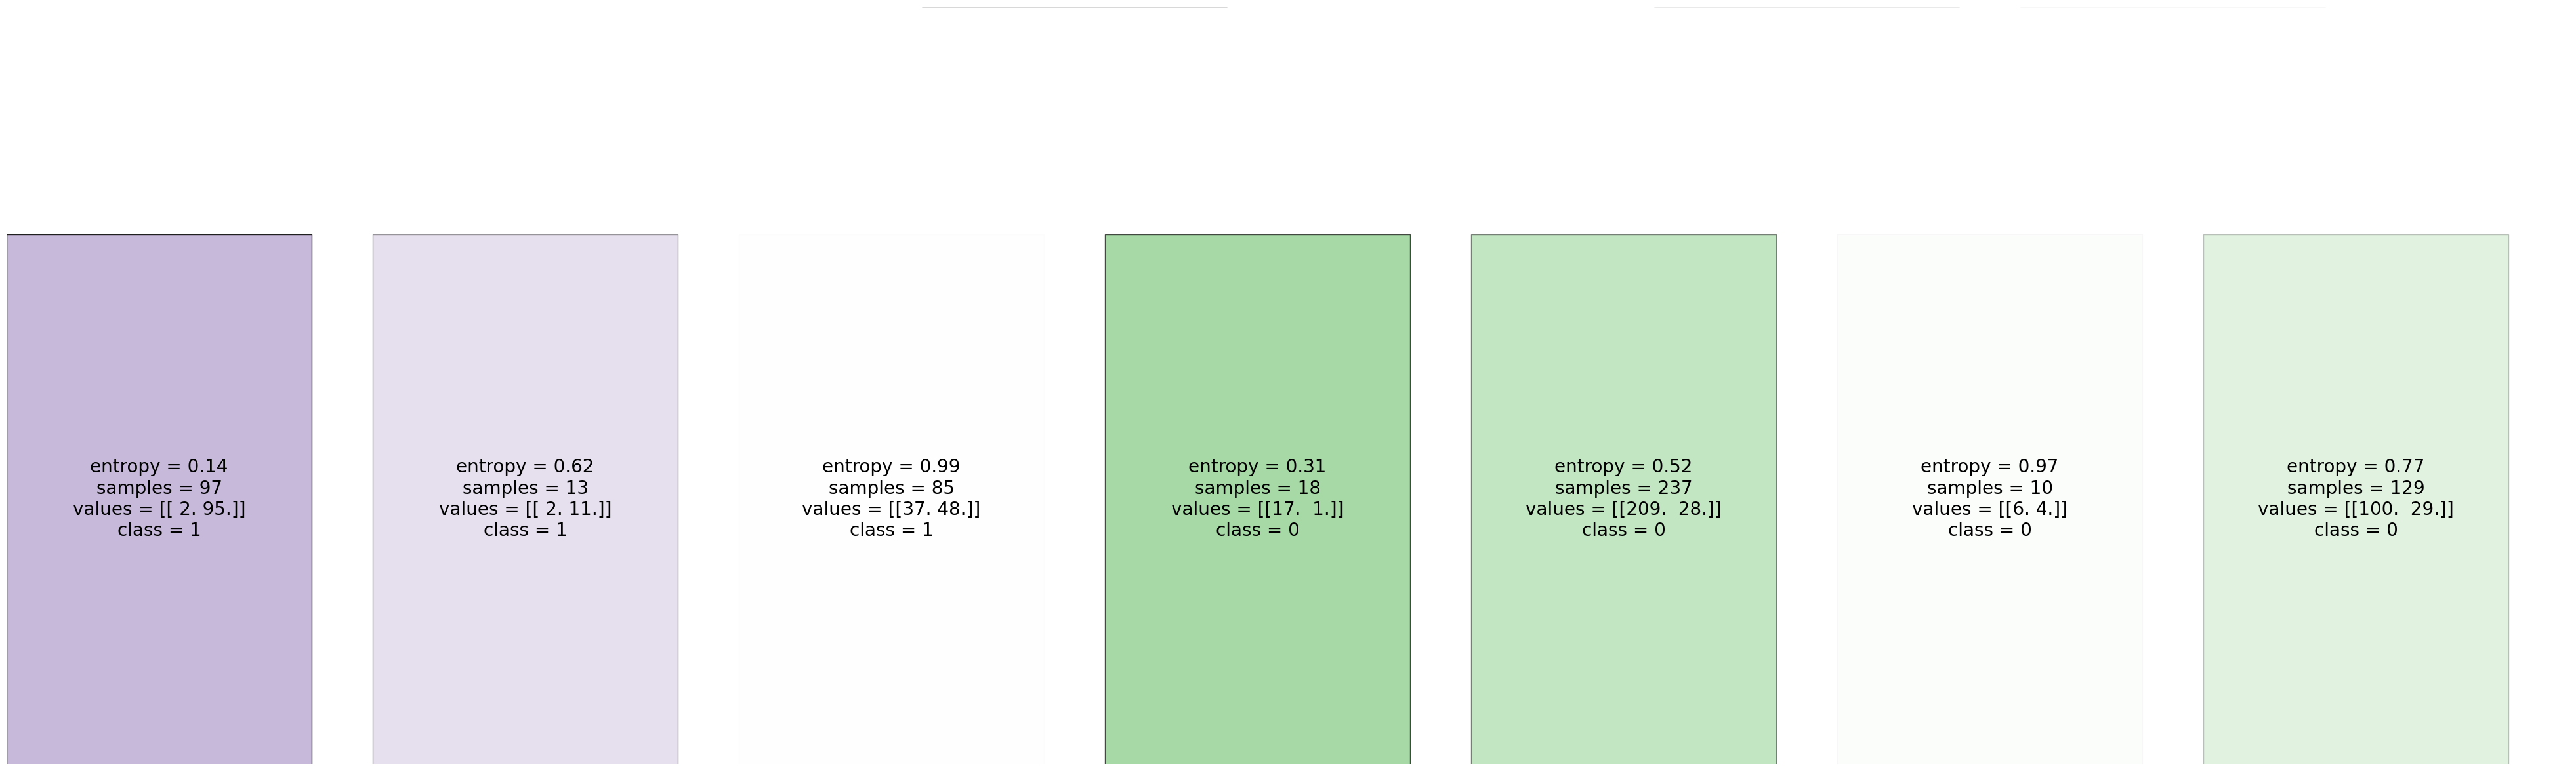

In [86]:
# This tree gives error
# Make sure to run all three commands
# Use old .dot.exe and it will run
# 1. Open anaconda prompt / people with mac runon terminal
# pip install graphviz

# conda install graphviz
# pip install pydotplus

from dtreeplt import dtreeplt
import matplotlib.pyplot as plt
dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=['0','1'])
fig = dtree.view()
currentFigure=plt.gcf()
currentFigure.set_size_inches(30,10)
# Double click on the graph to zoom in